# FRB/US, Structure
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

In this notebook you can inspext the logical structure of the model 

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 

This notebook implement the **VAR** flavour. 

## Import Python libraries

In [4]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [5]:
from modelclass import model  
model.widescreen() # Use the whole screen 


## Load the model and the data 
The model and the data has been prepared in a preprocessor step and has been wrapped into one file. 

In [6]:
mfrbus, basedf =  model.modelload('../../../../model_repo/frbusvar.pcim',run=0) 

file read:  C:\modelflow manual\model_repo\frbusvar.pcim


## Look at the model structure 

The causal/logical  structure of the model is captured by creating a dependency graph of the model. It can be visualized in several ways. One is just to look at the graph. However it can be messy for a model like this. Another is to look at the adjacency matrix representation of the  graph. This also allows us to inspect the which equations are part of a simultaneous system (a feedback block) and which are recursive.  

### The dependency graph 

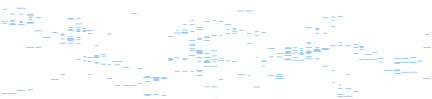

In [10]:
mfrbus.drawendo(lag=0,title='FRB/US endogeneous interpendencies',svg=1,browser=0)
# you will find the output files in different format in the /graph folder (graph/)

### The adjacency matrix for only for the current time frame 
This is used when the model is solved, as only the simultaneous (feedback) block has to be solved iterative. 

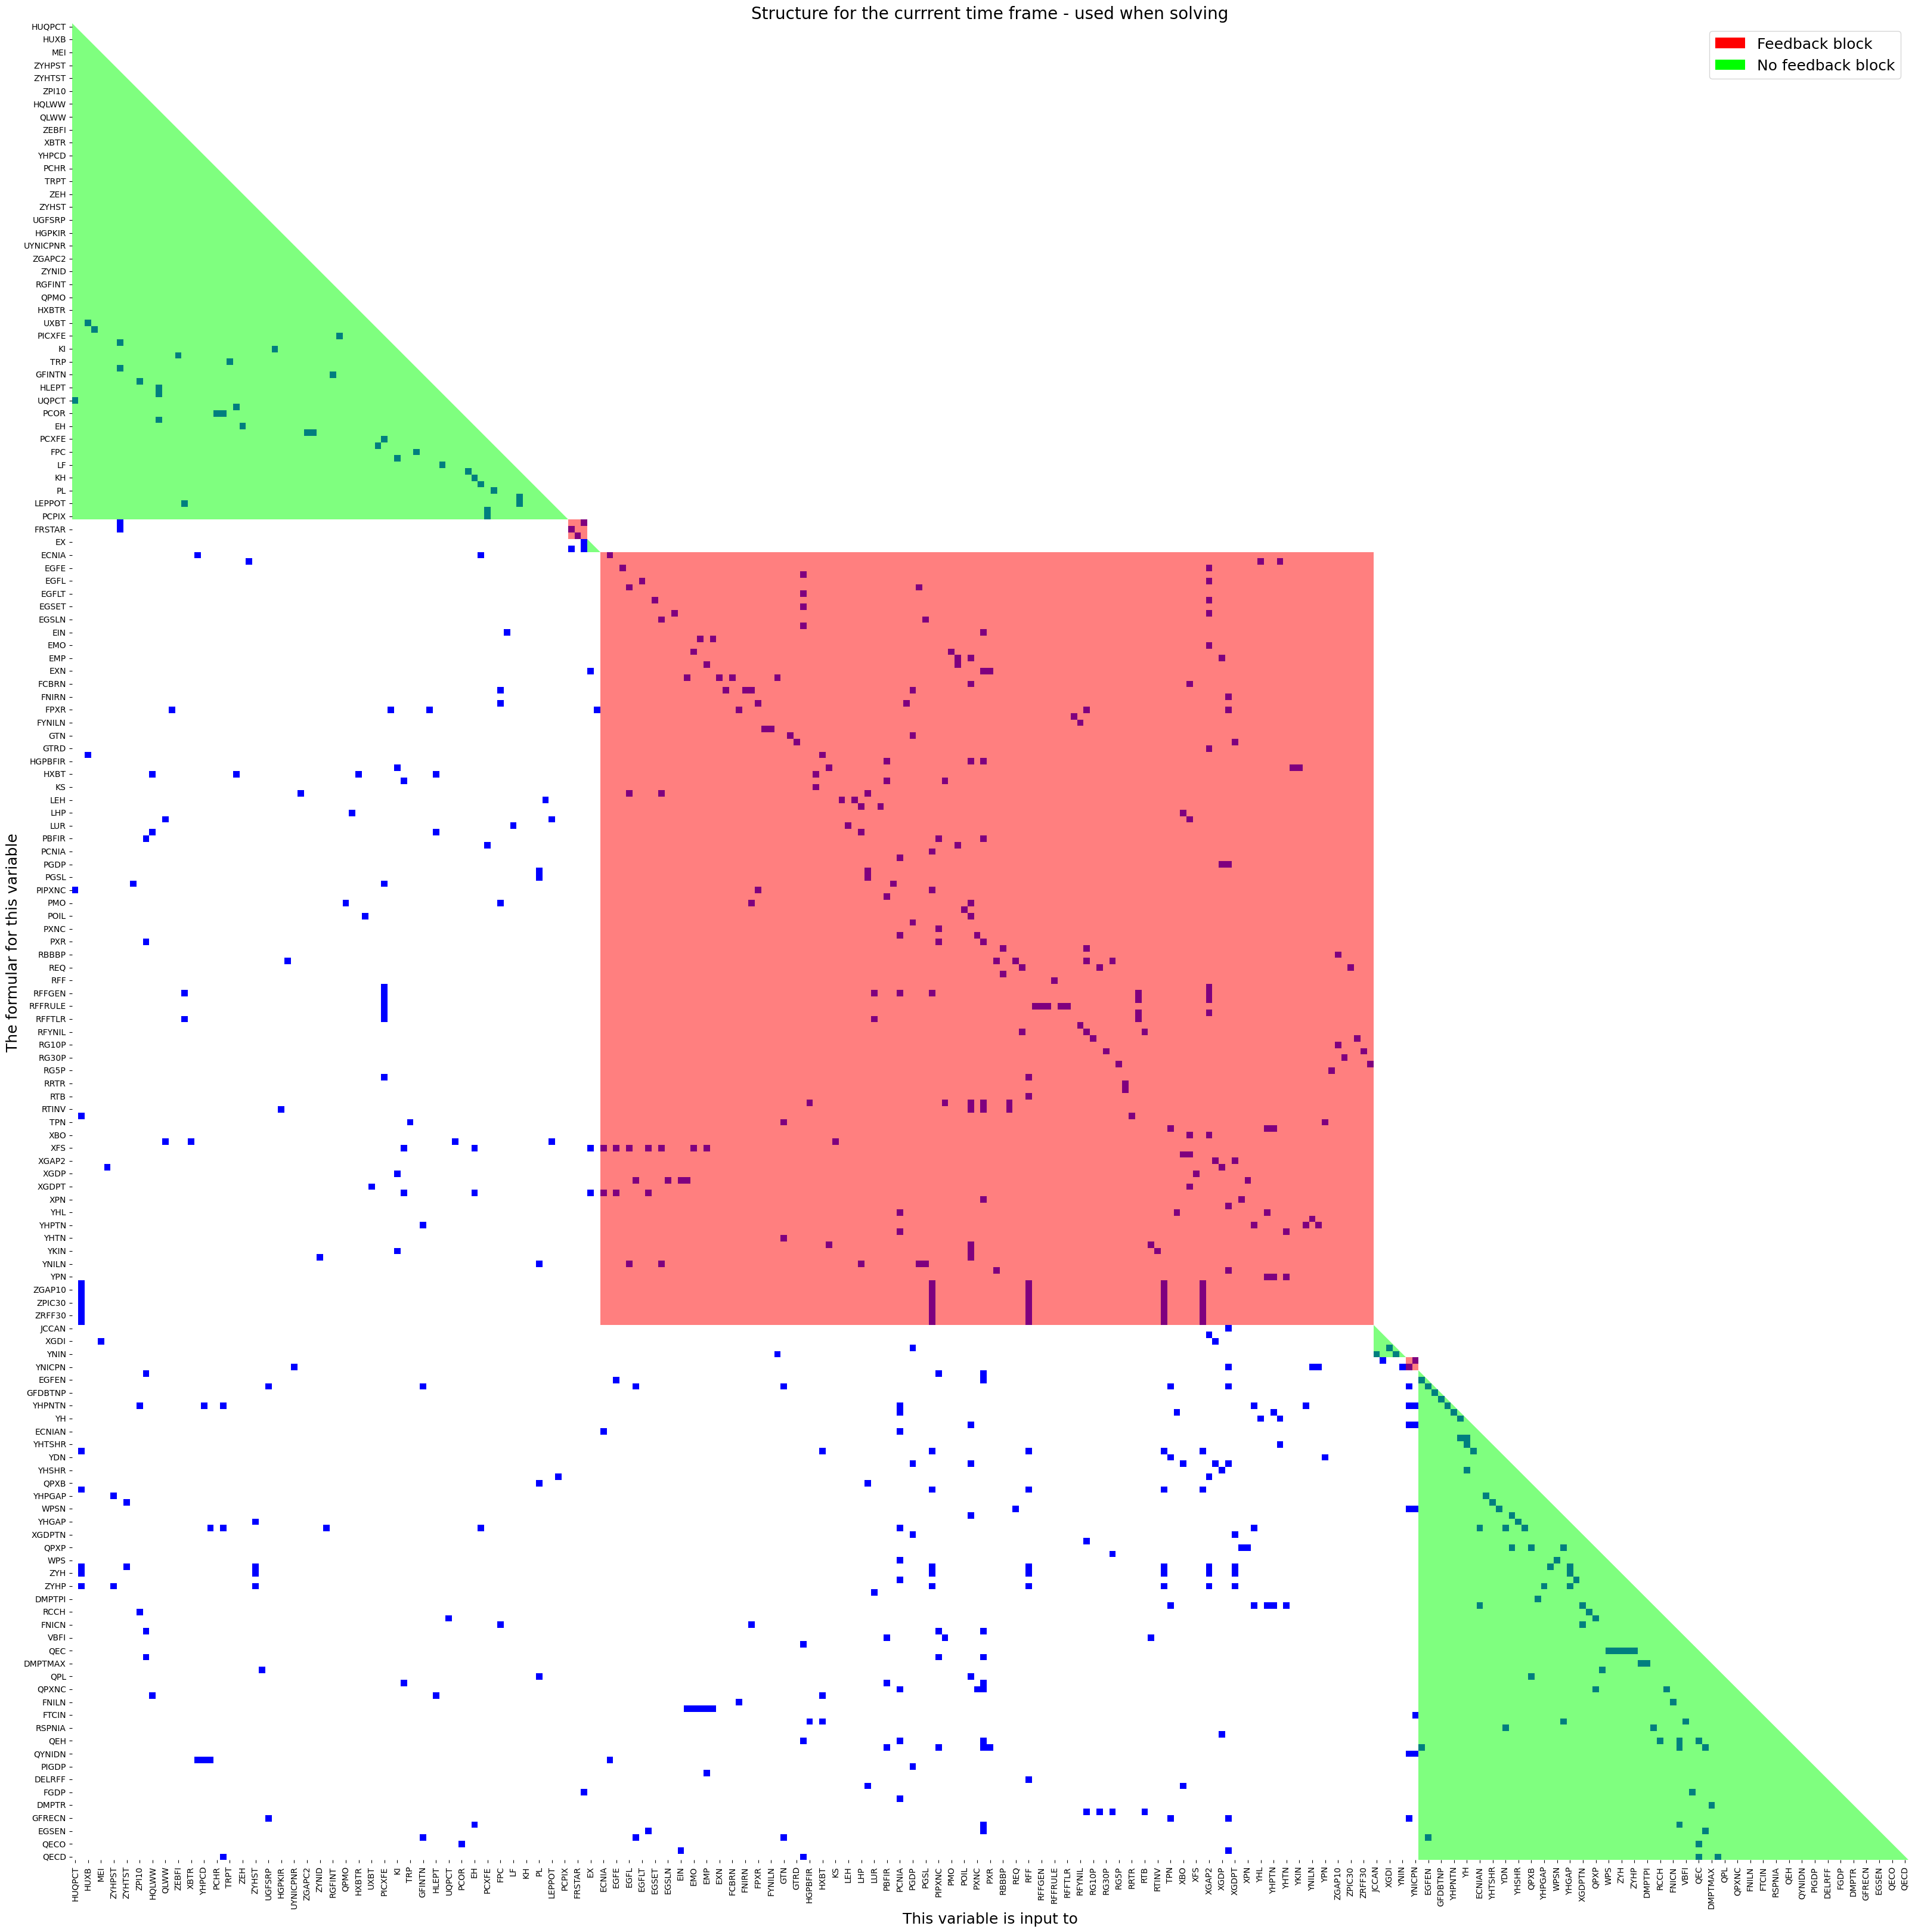

In [8]:
fig   = mfrbus.plotadjacency(size=(40,40),title= 'Structure for the currrent time frame - used when solving')
fig.savefig('graph/FRB-US causality structure current time.pdf') # To save the rendering in a pdf file

###  The adjacency matrix including lagged variables. 
This shows the economic feedback 

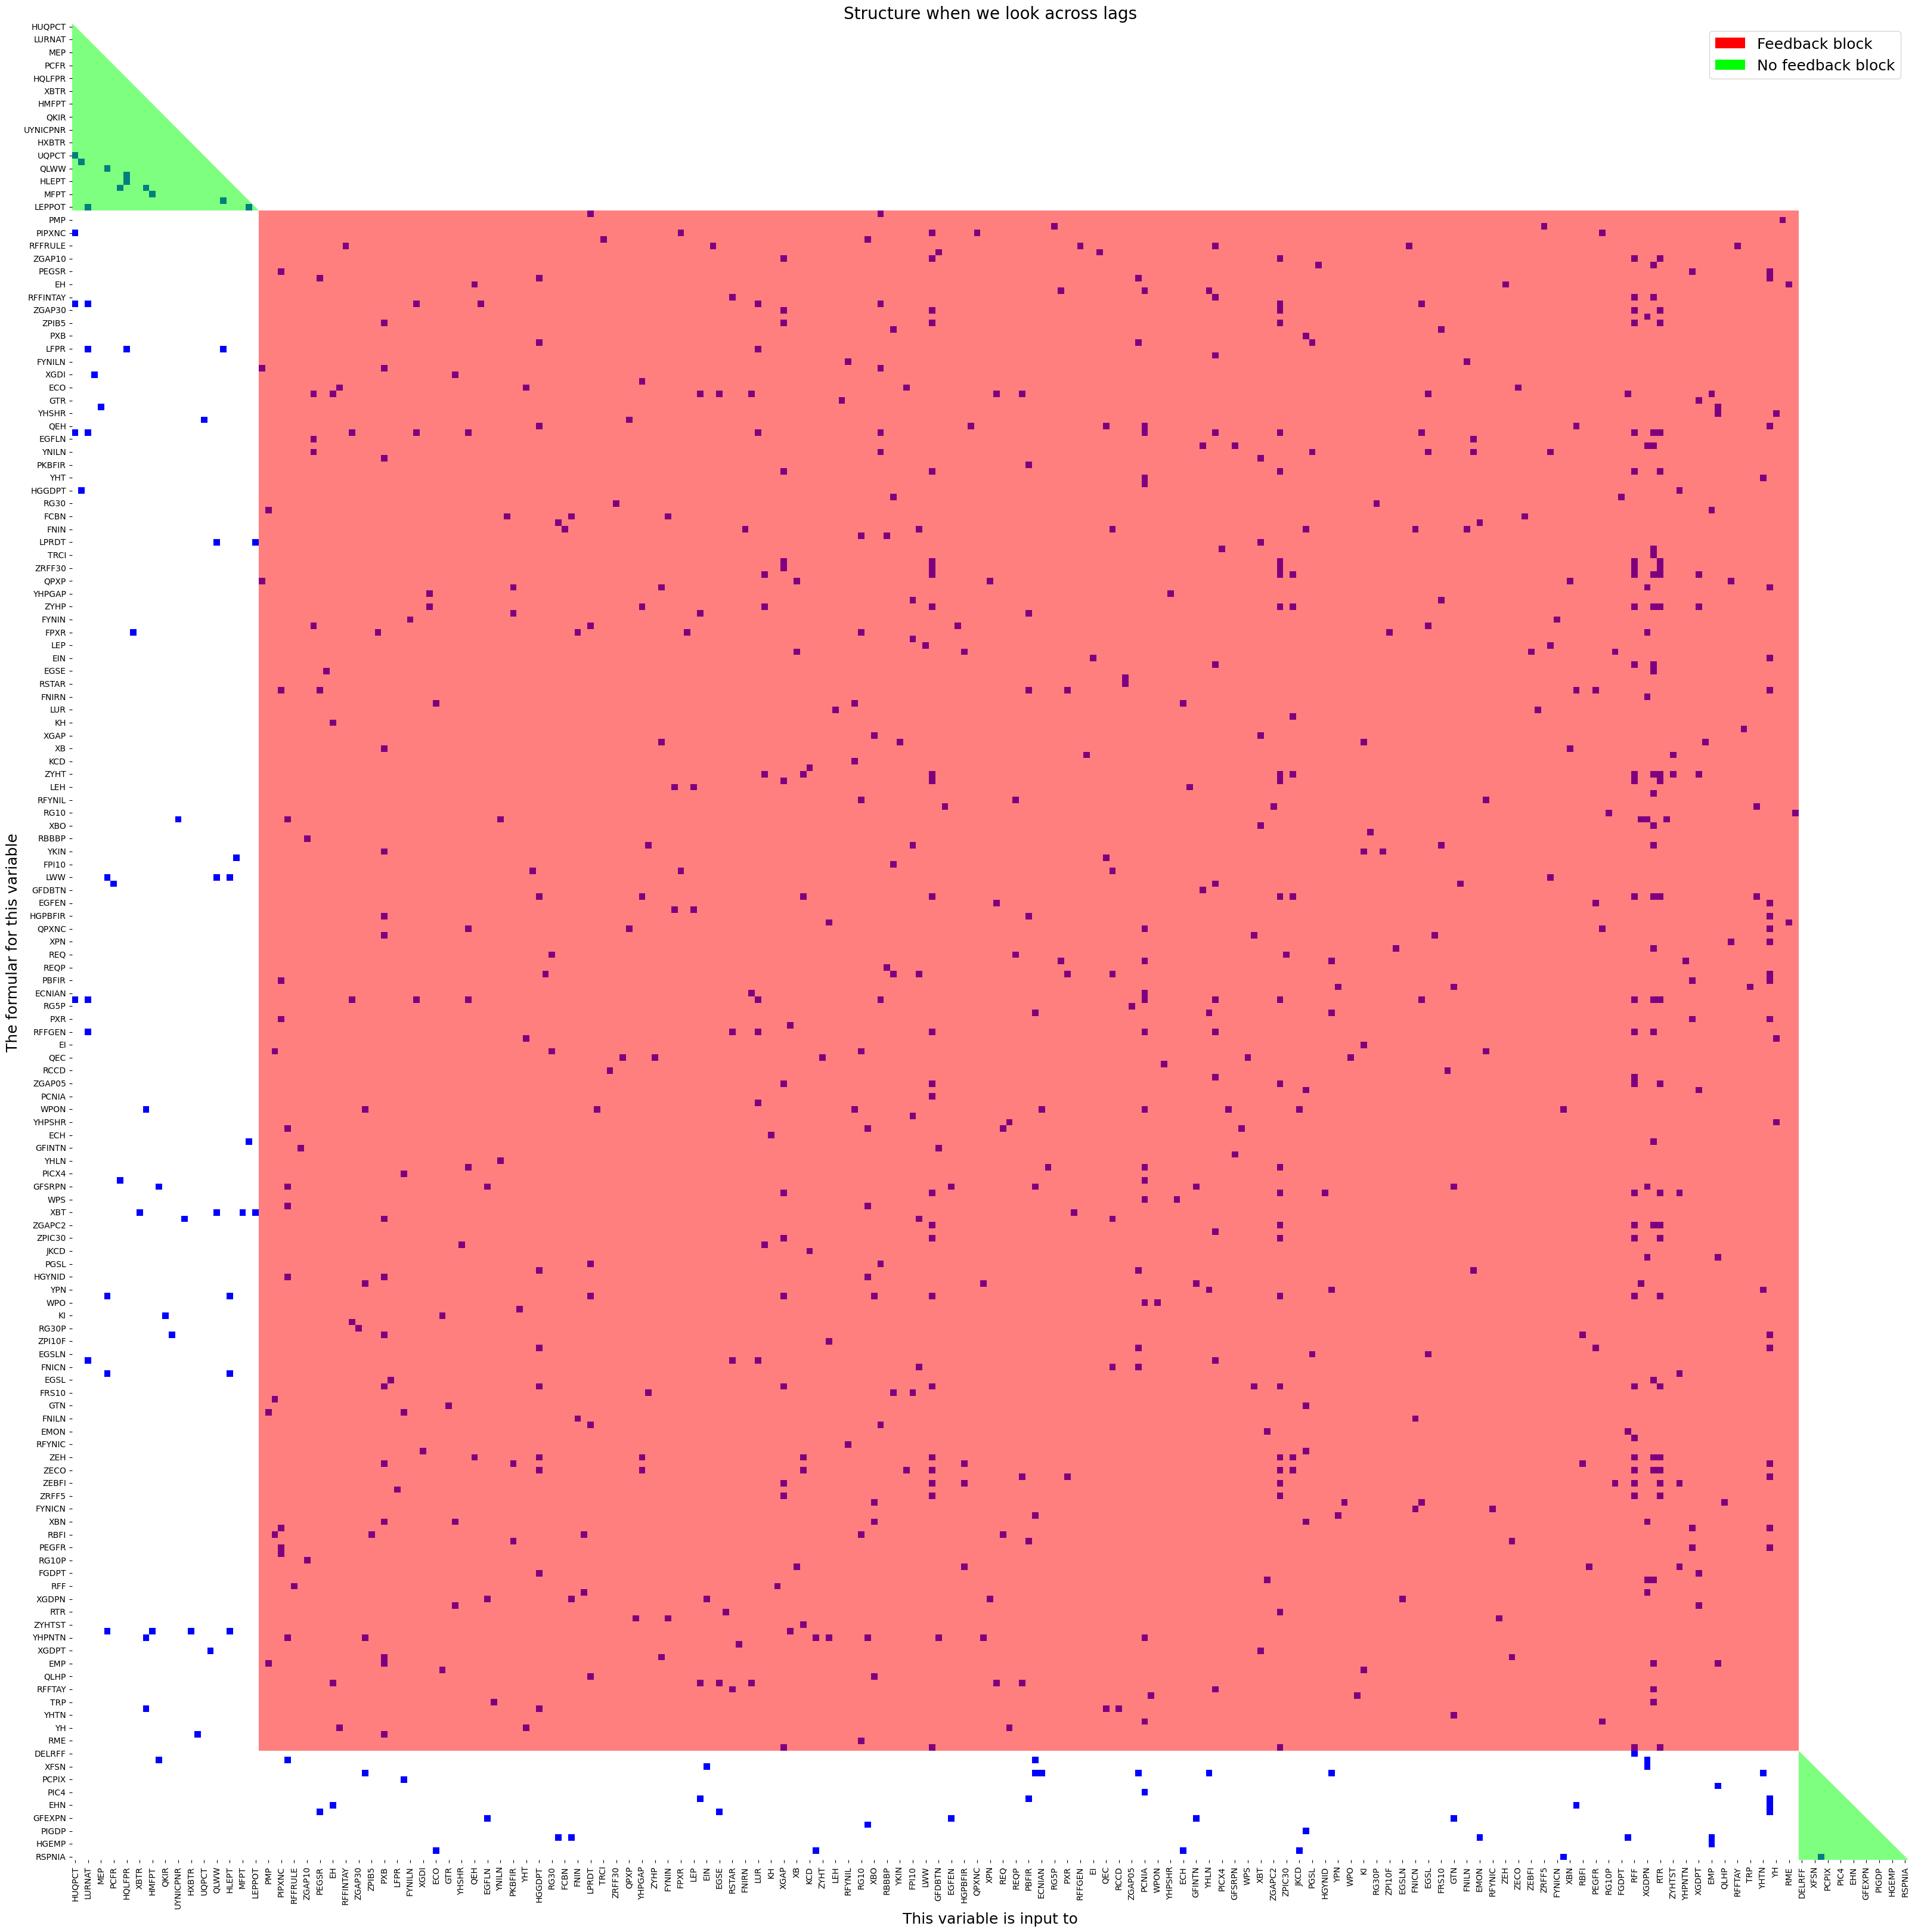

In [9]:
fig   = mfrbus.plotadjacency(size=(40,40),nolag=True,title='Structure when we look across lags')